Simple linear regession

Objectives
After completing this lab, you will be able to:

Use scikit-learn to implement simple linear regression
Create, train, and test a linear regression model on real data
Import needed packages


For this lab, you will need to have the following packages:

NumPy
Matplotlib
Pandas
Scikit-learn

In [1]:
!pip install numpy==2.2.0
!pip install pandas==2.2.3
!pip install scikit-learn==1.6.0
!pip install matplotlib==3.9.3

   ---------------------------------------- 0.0/12.6 MB ? eta -:--:--
   ------ --------------------------------- 2.1/12.6 MB 11.8 MB/s eta 0:00:01
   -------------- ------------------------- 4.5/12.6 MB 11.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.8/12.6 MB 11.7 MB/s eta 0:00:01
   ----------------------------- ---------- 9.2/12.6 MB 11.4 MB/s eta 0:00:01
   ------------------------------------ --- 11.5/12.6 MB 11.5 MB/s eta 0:00:01
   ---------------------------------------- 12.6/12.6 MB 11.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.2.0 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.0 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.0 which is incompatible.


   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
   ---- ----------------------------------- 1.3/11.5 MB 9.5 MB/s eta 0:00:02
   ------------- -------------------------- 3.9/11.5 MB 10.7 MB/s eta 0:00:01
   --------------------- ------------------ 6.3/11.5 MB 11.0 MB/s eta 0:00:01
   ------------------------------ --------- 8.7/11.5 MB 11.2 MB/s eta 0:00:01
   -------------------------------------- - 11.0/11.5 MB 11.3 MB/s eta 0:00:01
   ---------------------------------------- 11.5/11.5 MB 10.9 MB/s eta 0:00:00
  Attempting uninstall: pandas
    Found existing installation: pandas 2.2.2
    Uninstalling pandas-2.2.2:
      Successfully uninstalled pandas-2.2.2
   ---------------------------------------- 0.0/11.1 MB ? eta -:--:--
   --- ------------------------------------ 1.0/11.1 MB 12.7 MB/s eta 0:00:01
   ------------- -------------------------- 3.7/11.1 MB 9.9 MB/s eta 0:00:01
   --------------------- ------------------ 6.0/11.1 MB 10.5 MB/s eta 0:00:01
   ---

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

Load the data:

The dataset you will use resides at the following URL. You can use the URL directly with the Pandas library to load the dataset.

In [2]:
url= "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ML0101EN-SkillsNetwork/labs/Module%202/data/FuelConsumptionCo2.csv"

In [3]:
df=pd.read_csv(url)

In [4]:
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Understand the data

FuelConsumption.csv:

You will use a fuel consumption dataset, FuelConsumption.csv, which contains model-specific fuel consumption ratings and estimated carbon dioxide emissions for new light-duty vehicles for retail sale in Canada. Dataset source.

MODEL YEAR e.g. 2014

MAKE e.g. VOLVO

MODEL e.g. S60 AWD

VEHICLE CLASS e.g. COMPACT

ENGINE SIZE e.g. 3.0

CYLINDERS e.g 6

TRANSMISSION e.g. AS6

FUEL TYPE e.g. Z

FUEL CONSUMPTION in CITY(L/100 km) e.g. 13.2

FUEL CONSUMPTION in HWY (L/100 km) e.g. 9.5

FUEL CONSUMPTION COMBINED (L/100 km) e.g. 11.5

FUEL CONSUMPTION COMBINED MPG (MPG) e.g. 25

CO2 EMISSIONS (g/km) e.g. 182

Your task will be to create a simple linear regression model from one of these features to predict CO2 emissions of unobserved cars based on that feature.

In [5]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


Explore the data
First, consider a statistical summary of the data.

You can see from the statistics here that 75% of the cars have a combined fuel consumption falling within a range of up to almost three times that of the most efficient car, with respective values of 31 MPG and 11 MPG.

The highest fuel consumer at 60 MPG is suspiciously high but could be legitimate.

MODELYEAR has 0 standard deviation, and thus has no interesting information content.


In [6]:
# selection of features
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.sample(9)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
59,3.0,6,11.6,267
951,2.0,4,7.8,179
792,1.6,4,8.3,191
391,6.2,8,18.0,414
17,4.7,8,15.4,354
780,1.6,4,7.8,179
1017,2.0,4,9.4,216
803,1.6,4,8.0,184
242,4.3,6,12.6,290


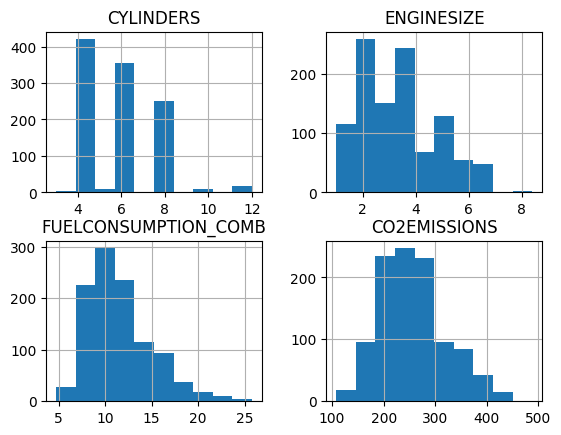

In [7]:
#VISUALIZATION OF FEATURES
viz = cdf[['CYLINDERS','ENGINESIZE','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
viz.hist()
plt.show()

As you can see, most engines have 4, 6, or 8 cylinders, and engine sizes between 2 and 4 liters.
As you might expect, combined fuel consumption and CO2 emission have very similar distributions.
Go ahead and display some scatter plots of these features against the CO2 emissions, to see how linear their relationships are.

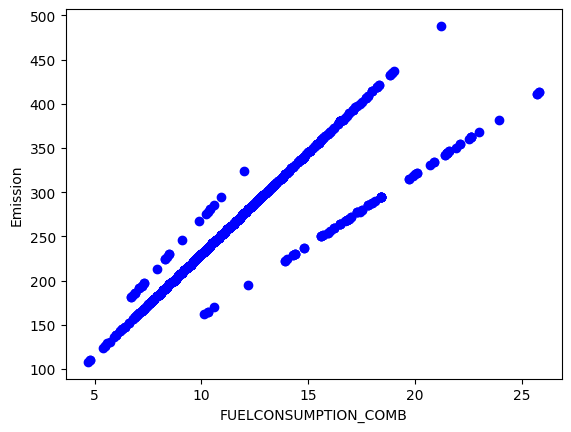

In [8]:
plt.scatter(cdf.FUELCONSUMPTION_COMB, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("Emission")
plt.show()

This is an informative result. Three car groups each have a strong linear relationship between their combined fuel consumption and their CO2 emissions. Their intercepts are similar, while they noticeably differ in their slopes.

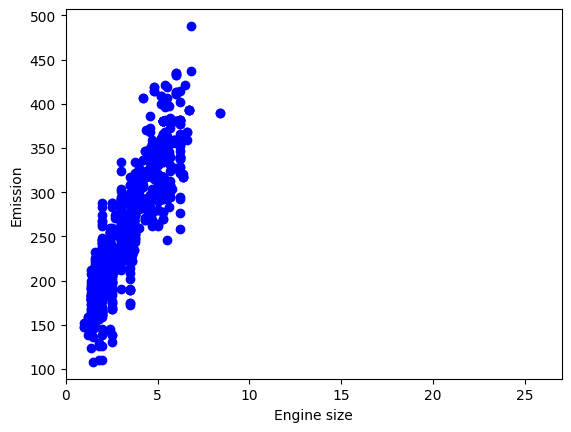

In [9]:
plt.scatter(cdf.ENGINESIZE, cdf.CO2EMISSIONS,  color='blue')
plt.xlabel("Engine size")
plt.ylabel("Emission")
plt.xlim(0,27)
plt.show()

Although the relationship between engine size and CO2 emission is quite linear, you can see that their correlation is weaker than that for each of the three fuel consumption groups. Notice that the x-axis range has been expanded to make the two plots more comparable.


Practice excercise 1 :

Plot CYLINDER against CO2 Emission, to see how linear their relationship is.

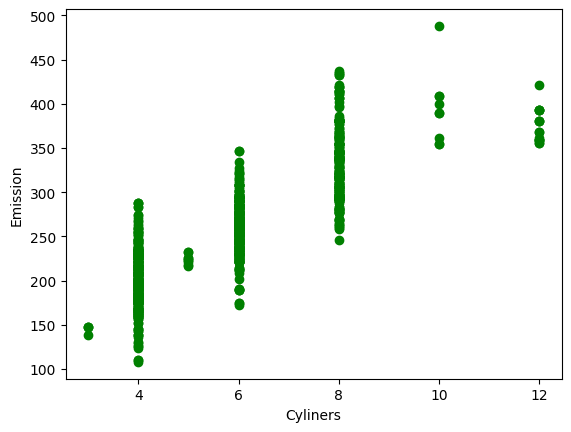

In [10]:
# write your code here
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS, color="green")
plt.xlabel("Cyliners")
plt.ylabel("Emission")
plt.show()

Extract the input feature and labels from the dataset:

Although perhaps not necessarily the ideal choice of input feature, for illustration purposes, you will use engine size to predict CO2 emission with a linear regression model.

You can begin the process by extracting the input feature and target output variables, X and y, from the dataset.

In [11]:
X = cdf.ENGINESIZE.to_numpy()
y = cdf.CO2EMISSIONS.to_numpy()

Create train and test datasets:

Next, you will split the dataset into mutually exclusive training and testing sets. You will train a simple linear regression model on the training set and estimate its ability to generalize to unseen data by using it to make predictions on the unseen testing data.

Since the outcome of each data point is part of the testing data, you have a means of evaluating the out-of-sample accuracy of your model.

Now, you want to randomly split your data into train and test sets, using 80% of the dataset for training and reserving the remaining 20% for testing. Which fraction to use here mostly depends on the size of your data, but typical training sizes range from 20% to 30%. The smaller your data, the larger your training set needs to be because it's easier to find spurious patterns in smaller data. The downside is that your evaluation of generalizability will have less reliability. Bigger is better when it comes to data.

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [13]:
#The outputs are one-dimensional NumPy arrays or vectors.
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (853,), (853,))

In [14]:
# Build a simple linear regression model
from sklearn import linear_model

# create a model object
regressor = linear_model.LinearRegression()

# train the model on the training data
# X_train is a 1-D array but sklearn models expect a 2D array as input for the training data, with shape (n_observations, n_features).
# So we need to reshape it. We can let it infer the number of observations using '-1'.
regressor.fit(X_train.reshape(-1, 1), y_train)

# Print the coefficients
print ('Coefficients: ', regressor.coef_[0]) # with simple linear regression there is only one coefficient, here we extract it from the 1 by 1 array.
print ('Intercept: ',regressor.intercept_)


Coefficients:  38.992978724434046
Intercept:  126.2897021740873


Here, Coefficient and Intercept are the regression parameters determined by the model.
They define the slope and intercept of the 'best-fit' line to the training data.

Visualize model outputs¶


You can visualize the goodness-of-fit of the model to the training data by plotting the fitted line over the data.

The regression model is the line given by y = intercept + coefficient * x.

In [15]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(0, 0.5, 'Emission')

Model evaluation:

You can compare the actual values and predicted values to calculate the accuracy of a regression model. Evaluation metrics play a key role in the development of a model, as they provide insight into areas that require improvement.

There are different model evaluation metrics, let's use MSE here to calculate the accuracy of our model based on the test set:

Mean Absolute Error: It is the mean of the absolute value of the errors. This is the easiest of the metrics to understand since it’s just an average error.

Mean Squared Error (MSE): MSE is the mean of the squared error. In fact, it's the metric used by the model to find the best fit line, and for that reason, it is also called the residual sum of squares.

Root Mean Squared Error (RMSE). RMSE simply transforms the MSE into the same units as the variables being compared, which can make it easier to interpret.

R-squared is not an error but rather a popular metric used to estimate the performance of your regression model. It represents how close the data points are to the fitted regression line. The higher the R-squared value, the better the model fits your data. The best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Use the predict method to make test predictions
y_test_ = regressor.predict(X_test.reshape(-1,1))

# Evaluation
print("Mean absolute error: %.2f" % mean_absolute_error(y_test, y_test_))
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_test_))
print("Root mean squared error: %.2f" % np.sqrt(mean_squared_error(y_test, y_test_)))
print("R2-score: %.2f" % r2_score(y_test, y_test_))

Mean absolute error: 24.10
Mean squared error: 985.94
Root mean squared error: 31.40
R2-score: 0.76


In [17]:
plt.scatter(X_test, y_test,  color='blue')
plt.plot(X_test, regressor.coef_ * X_test + regressor.intercept_, '-r')
plt.xlabel("Engine size")
plt.ylabel("Emission")

Text(38.347222222222214, 0.5, 'Emission')